# SRW

## Prepare Bluesky and trigger a simulated Sirepo detector in SRW


Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2021-12-09 14:53:02
Persistent Unique Scan ID: '79714c95-55ad-4288-9e31-dc2b7d260c37'
New stream: 'primary'
+-----------+------------+--------------------------------+--------------+
|   seq_num |       time | Aperture_sirepo_horizontalSize | srw_det_mean |
+-----------+------------+--------------------------------+--------------+
|         1 | 14:53:12.1 |                          0.000 |        0.000 |
|         2 | 14:53:17.4 |                          0.050 | 53078019985587.875 |
|         3 | 14:53:21.6 |                          0.100 | 117643347136211.078 |
|         4 | 14:53:25.8 |                          0.150 | 165182853921254.469 |
|         5 | 14:53:30.0 |                          0.200 | 207544619693860.719 |
|         6 | 14:53:34.2 |                          0.250 | 255227882891592.688 |
+-----------+------------+--------------------------------+--------------+
generator scan ['79714c95'] (scan num: 1)





('79714c95-55ad-4288-9e31-dc2b7d260c37',)

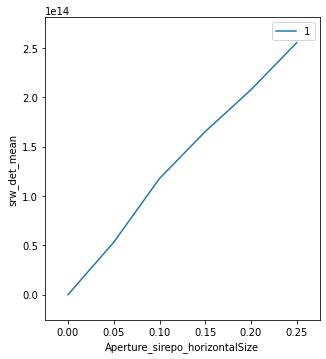

In [1]:
#%matplotlib widget
%run -i _prepare_det_env.py

import sirepo_bluesky.srw_detector as sd
import bluesky.plans as bp
# Note: replace '00000001' with the `sim_id` from your simulation
srw_det = sd.SirepoSRWDetector(sim_id='00000001', sim_type='srw',
                                sirepo_server='http://localhost:8000',
                                root_dir='/tmp/sirepo-bluesky-data')
srw_det.select_optic('Aperture')
param1 = srw_det.create_parameter('horizontalSize')
param2 = srw_det.create_parameter('verticalSize')
srw_det.configuration_attrs = ['horizontal_extent', 'vertical_extent', 'shape']
#RE(bp.grid_scan([srw_det], param1, -1, 1, 2, param2, -1, 1, 2))
RE(bp.scan([srw_det], param1, 0, .25, 6))

We can access the data as the last item in the database (db[-1]), which when plotted as an image will look like:

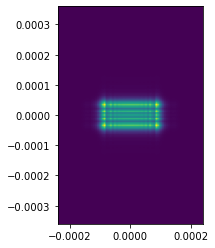

In [2]:
hdr = db[-1]
imgs = list(hdr.data(f'{srw_det.name}_image'))
cfg = hdr.config_data(srw_det.name)['primary'][0]
hor_ext = cfg[f'{srw_det.name}_horizontal_extent']
vert_ext = cfg[f'{srw_det.name}_vertical_extent']
plt.imshow(imgs[-2], aspect='equal', extent=(*hor_ext, *vert_ext))

To view single-electron spectrum report (**Hint:** use a different
``sim_id``, e.g. for the NSLS-II CHX beamline example):

In [10]:

%run -i _prepare_det_env.py
import sirepo_bluesky.srw_detector as sd
import bluesky.plans as bp

#srw_det = sd.SirepoSRWDetector(sim_id='<sim_id>', source_simulation=True,
#                                  sirepo_server='http://localhost:8000')
#srw_det.configuration_attrs = ['photon_energy', 'shape']

srw_det = sd.SirepoSRWDetector(sim_id='hUZPYiMG', sim_type='srw', source_simulation=True,
                            sirepo_server='http://localhost:8000',
                            root_dir='/tmp/sirepo-bluesky-data')

srw_det.configuration_attrs = ['photon_energy', 'shape']

In [11]:
RE(bp.count([srw_det]))



Transient Scan ID: 1     Time: 2021-12-09 14:56:11
Persistent Unique Scan ID: '68c0357d-3adb-411f-87bf-04eb98ff57aa'
New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | srw_det_mean |
+-----------+------------+--------------+
|         1 | 14:56:18.8 | 39552176343431.875 |
+-----------+------------+--------------+
generator count ['68c0357d'] (scan num: 1)





('68c0357d-3adb-411f-87bf-04eb98ff57aa',)

We can observe the produced spectrum as 

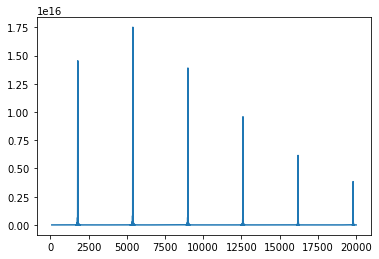

In [12]:
hdr = db[-1]
cfg = hdr.config_data(srw_det.name)['primary'][0]
energies = cfg[f'{srw_det.name}_photon_energy']
spectrum, = hdr.data(f'{srw_det.name}_image')
plt.plot(energies, spectrum)

## Use a simulated Sirepo Flyer to run multiple simulations

This section is based on the Young's Double Slit Experiment Sirepo example
that can be found in the wavefront propagation folder on the SRW simulations
section

Open the simulation and grab the new UID (the last 8 alphanumeric symbols), then start ``ipython`` and run the following:

In [23]:
%run -i _prepare_flyer_env.py
import bluesky.plans as bp
import sirepo_bluesky.sirepo_flyer as sf

We can reate 5 different simulations that change 4 parameters at a time

In [24]:
params_to_change = []
for i in range(1, 4):
    key1 = 'Aperture'
    parameters_update1 = {'horizontalSize': i * .1, 'verticalSize': (16 - i) * .1}
    key2 = 'Lens'
    parameters_update2 = {'horizontalFocalLength': i + 7}
    key3 = 'Obstacle'
    parameters_update3 = {'horizontalSize': 6 - i}
    params_to_change.append({key1: parameters_update1,
                                key2: parameters_update2,
                                key3: parameters_update3})

To create the flyer and run a fly scan, where ``sim_id`` is the UID of this simulation, we run

In [26]:
sim_id = '00000000' # Young's Double Slit Experiment

sirepo_flyer = sf.SirepoFlyer(sim_id=sim_id, server_name='http://localhost:8000',
                                      root_dir='/tmp/sirepo-bluesky-data', params_to_change=params_to_change,
                                      watch_name='W60')

RE(bp.fly([sirepo_flyer]))



Transient Scan ID: 2     Time: 2021-12-08 14:42:40
Persistent Unique Scan ID: 'bf8507e1-d980-40b9-b99b-65065e51a4e4'
copy 00000000 -> osxkLE8p, Youngs Double Slit Experiment Bluesky 2
copy 00000000 -> ygyxl98K, Youngs Double Slit Experiment Bluesky 3
copy 00000000 -> GrI4cDP4, Youngs Double Slit Experiment Bluesky 4
running sim osxkLE8p
running sim ygyxl98K
running sim GrI4cDP4
Status of sim osxkLE8p: completed
Status of sim ygyxl98K: completed
Status of sim GrI4cDP4: completed
New stream: 'sirepo_flyer'
copy osxkLE8p data hash: d5d6628d50bd65a329717e8ffb942224
copy ygyxl98K data hash: d6f8b77048fe6ad48e007cfb776528ad
copy GrI4cDP4 data hash: e5f914471d873f156c31815ab705575f


/Users/thomas/mambaforge/envs/sirepo-bluesky/lib/python3.9/site-packages/event_model/__init__.py:208: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  warnings.warn(


('bf8507e1-d980-40b9-b99b-65065e51a4e4',)

We access the data in the same manner as before

In [27]:
hdr = db[-1]
hdr.table(stream_name='sirepo_flyer')

,time,sirepo_flyer_image,sirepo_flyer_shape,sirepo_flyer_mean,sirepo_flyer_photon_energy,sirepo_flyer_horizontal_extent,sirepo_flyer_vertical_extent,sirepo_flyer_hash_value,sirepo_flyer_status,sirepo_flyer_Aperture_horizontalSize,sirepo_flyer_Aperture_verticalSize,sirepo_flyer_Lens_horizontalFocalLength,sirepo_flyer_Obstacle_horizontalSize
seq_num,,,,,,,,,,,,,
1,2021-12-08 19:43:02.947624922,3bfba48f-635b-4428-8b21-72ec7b46ad50,"[250, 896]",3.677965e+13,4240.0,"[-0.0013627376425855513, 0.0013596958174904943]","[-0.000249500998003992, 0.00024750499001996017]",d5d6628d50bd65a329717e8ffb942224,completed,0.1,1.5,8,5
3,2021-12-08 19:43:02.947624922,2032f4e7-a0a4-4226-944b-bac2d8be41a8,"[250, 440]",1.492891e+14,4240.0,"[-0.0009701657458563539, 0.0009701657458563542]","[-0.00024650698602794426, 0.0002504990019960079]",e5f914471d873f156c31815ab705575f,completed,0.3,1.3,10,3
2,2021-12-08 19:43:02.947624922,0b9ca03e-3cf6-4a5f-a304-7bd38b2c2efe,"[250, 546]",9.944933e+13,4240.0,"[-0.001015813953488372, 0.0010120930232558139]","[-0.000249500998003992, 0.00024750499001996017]",d6f8b77048fe6ad48e007cfb776528ad,completed,0.2,1.4,9,4


Leading/trailing empty lines: